In [1]:
import sys
import os 
src_dir = os.path.join(os.getcwd(), '..', 'src')
sys.path.append(src_dir)

In [2]:
import torch
import numpy as np
import seaborn as sns
import pandas as pd
import torchattacks as ta
import matplotlib.pyplot as plt

from models import mnist, cifar
from data_attacks import alg1, alg2, alg3, attackAny, nothing
from load_data import load_mnist, load_mnist_inv, load_cifar
from utils import test_attack, att
from utils import vis_attack as vis
from utils import saveAttackResults as testSave
from utils import analyse

In [3]:
net1 = mnist.MNIST1()
net1.load_state_dict(torch.load('../models/mnist-net1.pt'))
net1.eval()

net2 = mnist.MNIST2()
net2.load_state_dict(torch.load('../models/mnist-net2.pt'))
net2.eval()

net3 = mnist.MNIST3()
net3.load_state_dict(torch.load('../models/mnist-net3.pt'))
net3.eval()

net4 = mnist.MNIST4()
net4.load_state_dict(torch.load('../models/mnist-net4.pt'))
net4.eval()

netInv1 = mnist.MNIST1()
netInv1.load_state_dict(torch.load('../models/mnistInv-net1.pt'))
netInv1.eval()

netInv2 = mnist.MNIST2()
netInv2.load_state_dict(torch.load('../models/mnistInv-net2.pt'))
netInv2.eval()

netInv3 = mnist.MNIST3()
netInv3.load_state_dict(torch.load('../models/mnistInv-net3.pt'))
netInv3.eval()

netInv4 = mnist.MNIST4()
netInv4.load_state_dict(torch.load('../models/mnistInv-net4.pt'))
netInv4.eval()

netCif1 = cifar.CIFAR1()
netCif1.load_state_dict(torch.load('../models/cifar-net1.pt'))
netCif1.eval()

netCif2 = cifar.CIFAR2()
netCif2.load_state_dict(torch.load('../models/cifar-net2.pt'))
netCif2.eval();

In [165]:
id = 145
net = net2
correct = load_mnist.testSetCorrect(net,id+1)
atk1 = att.Att(ta.DeepFool(net, steps=10))
atk2 = attackAny.Any(alg3.Al1(type=2))
atk3 = attackAny.Any(nothing.Al())

In [171]:
im1, eps1 = atk1(net,correct[id][0])

In [170]:
outputs = net(im1)
_, predicted = torch.max(outputs.data,1)
print(predicted)
print(eps1)

tensor([2])
0.08999908


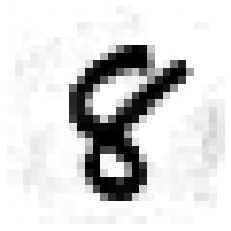

In [172]:
plt.axis("off")
plt.imshow(torch.ones((28,28)) - im1[0,0,:,:],cmap='gray')
plt.savefig('../results2/{}.png'.format('deepfool8'),bbox_inches='tight')

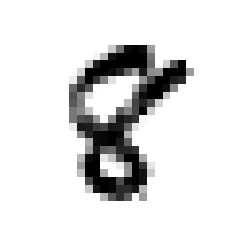

In [167]:
name = 'alg4Specific1000Net1'
imgs = np.load('../resultsNumpy/{}_imgs.npy'.format(name))
im2 = torch.tensor(imgs[id,predicted])[None,None].float()
plt.axis("off")
plt.imshow(torch.ones((28,28)) - im2[0,0,:,:],cmap='gray')
plt.savefig('../results2/{}.png'.format('componentwise8'),bbox_inches='tight')

In [160]:
eps2 = np.load('../resultsNumpy/{}_epss.npy'.format(name))[id,predicted]
print(eps2)

0.22526411712169647


In [157]:
outputs = net(im2)
_, predicted = torch.max(outputs.data,1)
print(predicted)

tensor([2])


In [166]:
im3, eps3 = atk3(net,correct[id][0])

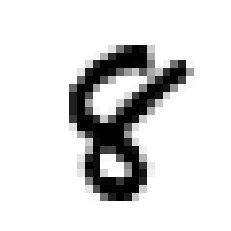

In [168]:
plt.axis("off")
plt.imshow(torch.ones((28,28)) - im3[0,0,:,:],cmap='gray')
plt.savefig('../results2/{}.png'.format('original8'),bbox_inches='tight')